# 코로나19 유행 전후 한국 소비자원 피해구제 현황 데이터 분석

## 소비자 리포트조 (4조)

### 분석 목적 및 의의

본 분석의 목적은 한국 소비자원 피해구제 현황 데이터를 분석하여 코로나 19 유행 이전과 이후의 구제현황을 비교해보며 가설을 검증하고, 코로나 19가 어떤 영향을 미쳤는지 파악하는데 의의가 있다.

### 분석 방향

코로나 이전과 이후의 피해구제 현황에 대한 가설을 설정하고 시각화 및 분석을 통해 이를 검증한다.


### 데이터 설명 

#### 한국 소비자원 피해구제 데이터 
1. 데이터 출처: 공공데이터: https://www.data.go.kr/data/3040720/fileData.do
2. 데이터 설명:2015 ~ 2021년 까지의 한국 소비자원 피해구제 데이터(2015 ~ 2021 3/4분기)
3. 컬럼 설명:
 - 접수일(년월일):                                            
 - 성별:                                                       
 - 연령대:                                                    
 - 지역:                                                       
 - 판매유형: 일반판매, 방문판매, 온라인판매, 등의 변수가 있다.      
 - 물품소분류: 피해구제 건수의 물품들 종류들이 모아져있는 변수이다.  
 - 청구이유: 어떤 이유로 청구를 했는지에 대한 변수들이다.          

#### 한국 코로나 데이터 
1. 데이터 출처: 질병관리청 코로나 바이러스 감염증 - 19
2. 데이터 파일 출처: http://ncov.mohw.go.kr/
3. 데이터 설명: 일일 확진자 수 데이터가 들어있다. 
4. 컬럼 설명:
  - 일자
  - 확진자 수: 누적이 아닌 일일 형태 

#### 엄격성 지수 데이터 
1. 데이터 출처: Oxford Covid-19 정부 대응 추적기(OxCGRT)
2. 데이터 파일 출처: https://github.com/OxCGRT/covid-policy-tracker/blob/master/data/timeseries/c4_restrictions_on_gatherings.csv
3. 데이터 코드북 해석 출처: https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/codebook.md
4. 데이터 설명: 나라별 정책의 엄격함 수준을 나타내는 척도입니다.(그중에서 한국데이터만 사용)
5. 컬럼 설명 
  - country_name: South Korea 
  - variable: Date 
  - value: 엄격성 지수 0: 제한 없음, 1: 초대형 모임 제한(한도 1000명 이상), 2: 101 ~ 1000명 모임, 3:11 ~ 100명 모임, 4: 10명 이하 모임 제한

### 데이터 전처리 

#### 한국 소비자원 피해구제 데이터
1. 결측치 제거 
2. 날짜 별 추출(년도, 월, 일 독립 컬럼을 만듬)
3. 사건번호 제거 
4. 컬럼 이름 재정의
5. 각 시각화를 위한 데이터프레임 생성

#### 한국 코로나 데이터 
1. 엑셀 제목 결측치 제거 

#### 엄격성 지수 데이터
1. 날짜 컬럼 숫자로 변경 ( ex) 2020 Jun 18 -> 2020 - 06 - 18))
2. Long form을 wide form으로 변경

### 가설

가설 1. 코로나가 본격적으로 유행하기 시작한 2020년도부터 피해구제 신청건수가 늘어났을 것이다.

가설 2. 코로나 전후에 따라 비대면 판매유형 건수가 전체에서 차지하는 비중이 증가했을 것이다.

가설 3. 코로나 이후 표시광고, 계약해제.해지/위약금, AS불만에 대한 피해구제 신청이 늘어났을 것이다.

### 목차

#### 1. 데이터 전처리

#### 2. 시각화 및 가설 검증

#### 3. 추가분석

#### 4. 결론

# 1. 데이터 전처리

In [1]:
import pandas as pd
import os

path = './프로젝트데이터/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')] ## 파일명 끝이 .csv인 경우

In [2]:
df = pd.DataFrame()
for i in file_list_py:
    data = pd.read_csv(path + i, encoding = 'cp949')
    df = pd.concat([df,data])
    
df = df.reset_index(drop = True)

In [3]:
df

,접수일(년월일),성별,연령대,지역,물품소분류,판매유형,청구이유,사건번호
0,2015-01-02,남성,NaN,경기도,등산화,일반판매,AS불만,NaN
1,2015-01-02,남성,NaN,전라남도,기타이동통신,일반판매,품질(물품/용역),NaN
2,2015-01-02,여성,20 - 29세,서울특별시,외국어강습,일반판매,계약해제.해지/위약금,NaN
3,2015-01-02,여성,20 - 29세,부산광역시,여성용내의류,일반판매,계약해제.해지/위약금,NaN
4,2015-01-02,여성,NaN,경기도,경승용차,일반판매,품질(물품/용역),NaN
...,...,...,...,...,...,...,...,...
265393,2021-09-30,여성,20 - 29세,서울특별시,필라테스,일반판매,계약해제.해지/위약금,2.021040e+09
265394,2021-09-30,여성,50 - 59세,인천광역시,헬스장,방문판매,계약해제.해지/위약금,2.021040e+09
265395,2021-09-30,남성,50 - 59세,서울특별시,기타가사장비품,국내온라인거래,NaN,2.021040e+09
265396,2021-09-30,남성,60 - 64세,서울특별시,정수기대여(렌트),방문판매,NaN,2.021040e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265398 entries, 0 to 265397
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   접수일(년월일)  264201 non-null  object 
 1   성별        264201 non-null  object 
 2   연령대       249201 non-null  object 
 3   지역        264188 non-null  object 
 4   물품소분류     264149 non-null  object 
 5   판매유형      264189 non-null  object 
 6   청구이유      263383 non-null  object 
 7   사건번호      137006 non-null  float64
dtypes: float64(1), object(7)
memory usage: 16.2+ MB


가장 메인이 되는 데이터인 한국소비자원 '소비자 피해구제 정보' 데이터는 총 8개의 컬럼과 265398건의 피해구제 신청건으로 이루어져있다. 이에 대한 데이터 전처리는 분석에 필요하지 않은 사건번호 열을 제거하고, 데이터 타입 변환, 결측치 제거, 범주형 데이터 용어 통합 과정을 거쳐 정제된 데이터 셋을 만들었다.

### 사건번호 열 제거

In [5]:
df = df.drop('사건번호', axis = 1)
df

,접수일(년월일),성별,연령대,지역,물품소분류,판매유형,청구이유
0,2015-01-02,남성,NaN,경기도,등산화,일반판매,AS불만
1,2015-01-02,남성,NaN,전라남도,기타이동통신,일반판매,품질(물품/용역)
2,2015-01-02,여성,20 - 29세,서울특별시,외국어강습,일반판매,계약해제.해지/위약금
3,2015-01-02,여성,20 - 29세,부산광역시,여성용내의류,일반판매,계약해제.해지/위약금
4,2015-01-02,여성,NaN,경기도,경승용차,일반판매,품질(물품/용역)
...,...,...,...,...,...,...,...
265393,2021-09-30,여성,20 - 29세,서울특별시,필라테스,일반판매,계약해제.해지/위약금
265394,2021-09-30,여성,50 - 59세,인천광역시,헬스장,방문판매,계약해제.해지/위약금
265395,2021-09-30,남성,50 - 59세,서울특별시,기타가사장비품,국내온라인거래,NaN
265396,2021-09-30,남성,60 - 64세,서울특별시,정수기대여(렌트),방문판매,NaN


### 날짜 데이터타입 변환 및 년도 월 추출

In [6]:
df['접수일(년월일)'] = pd.to_datetime(df['접수일(년월일)'])

In [7]:
df['년도'] = pd.DatetimeIndex(df['접수일(년월일)']).year
df['월'] = pd.DatetimeIndex(df['접수일(년월일)']).month

### 결측치 제거

In [8]:
df = df.dropna(axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248368 entries, 2 to 265397
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   접수일(년월일)  248368 non-null  datetime64[ns]
 1   성별        248368 non-null  object        
 2   연령대       248368 non-null  object        
 3   지역        248368 non-null  object        
 4   물품소분류     248368 non-null  object        
 5   판매유형      248368 non-null  object        
 6   청구이유      248368 non-null  object        
 7   년도        248368 non-null  float64       
 8   월         248368 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 18.9+ MB


In [9]:
df

,접수일(년월일),성별,연령대,지역,물품소분류,판매유형,청구이유,년도,월
2,2015-01-02,여성,20 - 29세,서울특별시,외국어강습,일반판매,계약해제.해지/위약금,2015.0,1.0
3,2015-01-02,여성,20 - 29세,부산광역시,여성용내의류,일반판매,계약해제.해지/위약금,2015.0,1.0
6,2015-01-02,여성,30 - 39세,전라남도,인터넷교육서비스,일반판매,계약해제.해지/위약금,2015.0,1.0
7,2015-01-02,남성,40 - 49세,서울특별시,국외여행,국내전자상거래,계약불이행(불완전이행),2015.0,1.0
11,2015-01-02,남성,20 - 29세,광주광역시,자동차대여(렌트),일반판매,부당행위,2015.0,1.0
...,...,...,...,...,...,...,...,...,...
265390,2021-09-30,남성,30 - 39세,경기도,택배화물운송서비스,기타,AS불만,2021.0,9.0
265391,2021-09-30,여성,30 - 39세,경기도,소파,일반판매,품질(물품/용역),2021.0,9.0
265393,2021-09-30,여성,20 - 29세,서울특별시,필라테스,일반판매,계약해제.해지/위약금,2021.0,9.0
265394,2021-09-30,여성,50 - 59세,인천광역시,헬스장,방문판매,계약해제.해지/위약금,2021.0,9.0


### 연령대 통합

In [10]:
df['연령대'].unique()

array(['20 - 29세', '30 - 39세', '40 - 49세', '60 - 69세', '70 - 79세',
       '50 - 59세', '80세이상', '10 - 19세', '10세 미만', '불명', '30', '70', '20',
       '40', '50', '60', '10', '80', '(미입력)', '(구)60 - 69세', '65 - 69세',
       '60 - 64세', '65'], dtype=object)

In [11]:
df.replace(['10', '20', '30', '40', '50', '60', '65', '70', '80'],
          ['10대', '20대', '30대', '40대', '50대', '60대', '60대', '70대', '80세이상'],
          inplace = True)

df.replace(['(미입력)','10 - 19세', '20 - 29세', '30 - 39세',
            '40 - 49세', '50 - 59세', '60 - 64세',
            '65 - 69세', '70 - 79세', '80', '(구)60 - 69세', '60 - 69세'],
          ['불명', '10대', '20대', '30대', '40대', '50대', '60대', '60대', '70대', '80세이상', '60대', '60대'],
          inplace = True)

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:4385: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [12]:
df

,접수일(년월일),성별,연령대,지역,물품소분류,판매유형,청구이유,년도,월
2,2015-01-02,여성,20대,서울특별시,외국어강습,일반판매,계약해제.해지/위약금,2015.0,1.0
3,2015-01-02,여성,20대,부산광역시,여성용내의류,일반판매,계약해제.해지/위약금,2015.0,1.0
6,2015-01-02,여성,30대,전라남도,인터넷교육서비스,일반판매,계약해제.해지/위약금,2015.0,1.0
7,2015-01-02,남성,40대,서울특별시,국외여행,국내전자상거래,계약불이행(불완전이행),2015.0,1.0
11,2015-01-02,남성,20대,광주광역시,자동차대여(렌트),일반판매,부당행위,2015.0,1.0
...,...,...,...,...,...,...,...,...,...
265390,2021-09-30,남성,30대,경기도,택배화물운송서비스,기타,AS불만,2021.0,9.0
265391,2021-09-30,여성,30대,경기도,소파,일반판매,품질(물품/용역),2021.0,9.0
265393,2021-09-30,여성,20대,서울특별시,필라테스,일반판매,계약해제.해지/위약금,2021.0,9.0
265394,2021-09-30,여성,50대,인천광역시,헬스장,방문판매,계약해제.해지/위약금,2021.0,9.0


### 데이터 정수화

In [13]:
df = df.astype({'년도': int, '월': int})

### 변수 통일(판매유형)

In [14]:
df.replace(['국내전자상거래', '국제전자상거래'],
          ['국내온라인거래', '국제온라인거래'],
          inplace = True)

### 인덱스 초기화

In [15]:
df = df.reset_index()
df

,index,접수일(년월일),성별,연령대,지역,물품소분류,판매유형,청구이유,년도,월
0,2,2015-01-02,여성,20대,서울특별시,외국어강습,일반판매,계약해제.해지/위약금,2015,1
1,3,2015-01-02,여성,20대,부산광역시,여성용내의류,일반판매,계약해제.해지/위약금,2015,1
2,6,2015-01-02,여성,30대,전라남도,인터넷교육서비스,일반판매,계약해제.해지/위약금,2015,1
3,7,2015-01-02,남성,40대,서울특별시,국외여행,국내온라인거래,계약불이행(불완전이행),2015,1
4,11,2015-01-02,남성,20대,광주광역시,자동차대여(렌트),일반판매,부당행위,2015,1
...,...,...,...,...,...,...,...,...,...,...
248363,265390,2021-09-30,남성,30대,경기도,택배화물운송서비스,기타,AS불만,2021,9
248364,265391,2021-09-30,여성,30대,경기도,소파,일반판매,품질(물품/용역),2021,9
248365,265393,2021-09-30,여성,20대,서울특별시,필라테스,일반판매,계약해제.해지/위약금,2021,9
248366,265394,2021-09-30,여성,50대,인천광역시,헬스장,방문판매,계약해제.해지/위약금,2021,9


In [16]:
df = df.drop('index', axis = 1)
df

,접수일(년월일),성별,연령대,지역,물품소분류,판매유형,청구이유,년도,월
0,2015-01-02,여성,20대,서울특별시,외국어강습,일반판매,계약해제.해지/위약금,2015,1
1,2015-01-02,여성,20대,부산광역시,여성용내의류,일반판매,계약해제.해지/위약금,2015,1
2,2015-01-02,여성,30대,전라남도,인터넷교육서비스,일반판매,계약해제.해지/위약금,2015,1
3,2015-01-02,남성,40대,서울특별시,국외여행,국내온라인거래,계약불이행(불완전이행),2015,1
4,2015-01-02,남성,20대,광주광역시,자동차대여(렌트),일반판매,부당행위,2015,1
...,...,...,...,...,...,...,...,...,...
248363,2021-09-30,남성,30대,경기도,택배화물운송서비스,기타,AS불만,2021,9
248364,2021-09-30,여성,30대,경기도,소파,일반판매,품질(물품/용역),2021,9
248365,2021-09-30,여성,20대,서울특별시,필라테스,일반판매,계약해제.해지/위약금,2021,9
248366,2021-09-30,여성,50대,인천광역시,헬스장,방문판매,계약해제.해지/위약금,2021,9


In [17]:
def func(x):
    if x == '국내온라인거래':
        return '비대면거래'
    elif x == 'TV홈쇼핑':
        return '비대면거래'
    elif x == '국제온라인거래':
        return '비대면거래'
    elif x == '기타통신판매':
        return '비대면거래'
    elif x == '전화권유판매':
        return '비대면거래'
    elif x == '소셜커머스(쇼핑)':
        return '비대면거래'
    elif x == '모바일거래':
        return '비대면거래'
    else :
        return '대면거래'

df['비대면/대면_거래유형'] = df['판매유형'].apply(lambda x : func(x))

In [18]:
df.to_csv('프로젝트데이터최종본.csv', index=False, encoding='cp949')

### 시각화를 위한 폰트 및 툴 준비

In [19]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Serif',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'DejaVu Serif Display',
 'cmss10',
 'STIXSizeFiveSym',
 'STIXGeneral',
 'STIXSizeOneSym',
 'cmex10',
 'cmb10',
 'DejaVu Sans Display',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'DejaVu Serif',
 'cmsy10',
 'DejaVu Serif',
 'STIXGeneral',
 'STIXSizeFourSym',
 'STIXSizeTwoSym',
 'cmmi10',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXGeneral',
 'cmr10',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'cmtt10',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'STIXSizeThreeSym',
 'DejaVu Sans',
 'Bodoni MT',
 'HYHeadLine-Medium',
 'Berlin Sans FB',
 'Microsoft Uighur',
 'Sylfaen',
 'Times New Roman',
 'Gadugi',
 'Candara',
 'Consolas',
 'Tw Cen MT',
 'Palatino Linotype',
 'Book Antiqua',
 'Georgia',
 'Perpetua',
 'Gill Sans MT',
 'Elephant',
 'MS Gothic',
 'Constantia',
 'Courier New',
 'Leelawadee UI',
 'Georgia',
 'Rockwell Cond

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 폰트 적용
plt.rc('font', family='Gulim')
# 캔버스 사이즈 적용
plt.rcParams["figure.figsize"] = (12, 9)

#### 년도별 증가율을 확인하기 위한 전처리

In [21]:
df_count = df.년도.value_counts().rename_axis('년도').reset_index(name='건수')
df_count.sort_values(by = '년도', inplace = True)
df_count.reset_index(drop = True, inplace = True)
df_count

,년도,건수
0,2015,27683
1,2016,31480
2,2017,34093
3,2018,37027
4,2019,39933
5,2020,47080
6,2021,31072


In [22]:
change = pd.DataFrame({'증가율':df_count['건수'].pct_change() * 100})
change.fillna(0)
df_count = pd.concat([df_count, change], axis = 1)
df_count.fillna(0, inplace = True)

In [23]:
df1 = df[(df['비대면/대면_거래유형'] == '비대면거래')]
df1 = df1.groupby('년도').count()
df1['비대면 거래 건수'] = df1['성별']
df5 = pd.DataFrame()
df5['비대면 거래 건수'] = df1['비대면 거래 건수']
df5.reset_index(drop = True, inplace = True)
df2 = df[(df['청구이유'] == '계약해제.해지/위약금')]
df2 = df2.groupby('년도').count()
df2['계약해제.해지/위약금 건수'] = df2['성별']
df3 = pd.DataFrame()
df3['계약해제.해지/위약금 건수'] = df2['계약해제.해지/위약금 건수']
df3.reset_index(drop = True, inplace = True)
df4 = pd.concat([df_count, df3, df5], axis = 1)
df4['비대면 거래 비율'] = round(df4['비대면 거래 건수']/df4['건수'] *100)
df4

,년도,건수,증가율,계약해제.해지/위약금 건수,비대면 거래 건수,비대면 거래 비율
0,2015,27683,0.000000,6889,7920,29.0
1,2016,31480,13.715999,7469,10075,32.0
2,2017,34093,8.300508,8396,12388,36.0
3,2018,37027,8.605872,9307,15515,42.0
4,2019,39933,7.848327,11531,18822,47.0
5,2020,47080,17.897478,16911,22047,47.0
6,2021,31072,-34.001699,10412,14906,48.0


# 2. 시각화 및 가설 검증

### 가설 1

가설 1(코로나가 본격적으로 유행하기 시작한 2020년도부터 피해구제 신청건수가 늘어났을 것이다)을 검증하기 위해 년도별 피해구제 건수 및 증가율을 시각화 해보았다.

### 년도별 피해구제 건수 및 증가율

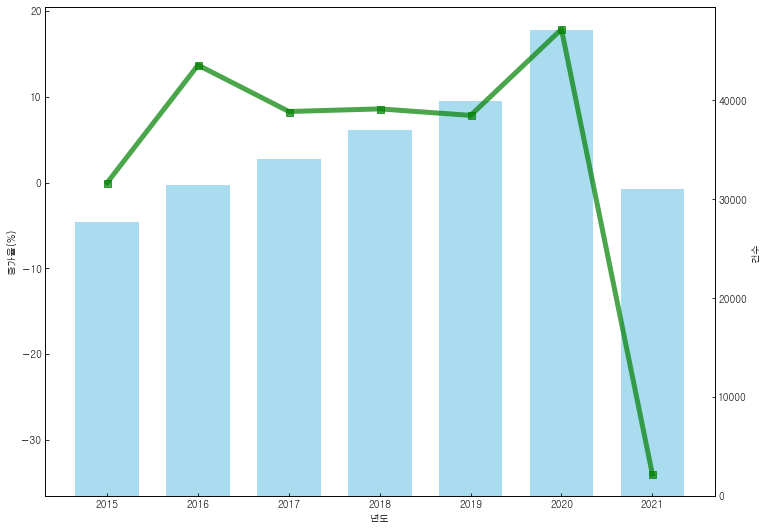

In [24]:
fig, ax1 = plt.subplots()

ax1.plot(df_count['년도'], df_count['증가율'], '-s', color='green', markersize=7, linewidth=5, alpha=0.7, label='증가율')
# ax1.set_ylim(0, 18)
ax1.set_xlabel('년도')
ax1.set_ylabel('증가율(%)')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(df_count['년도'], df_count['건수'], color='skyblue', label='건수', alpha=0.7, width=0.7)
# ax2.set_ylim(0, 18)
ax2.set_ylabel('건수')
ax2.tick_params(axis='y', direction='in')

ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)
plt.show()
## 데이터 레이블 표시하는 방법

In [25]:
df4[["년도", "건수", "증가율"]]

,년도,건수,증가율
0,2015,27683,0.000000
1,2016,31480,13.715999
2,2017,34093,8.300508
3,2018,37027,8.605872
4,2019,39933,7.848327
5,2020,47080,17.897478
6,2021,31072,-34.001699


#### 해석

코로나가 유행하기 시작한 2020년도에 피해구제 건수와 전년대비 증가율이 눈에띄게 증가된 것을 알 수 있다. 2017년부터 2019년까지는 연간 7~8% 정도 꾸준히 상승한 반면, 2020년에는 증가폭이 크게 늘어 2019년에 비해 피해구제 신청건이 약 18% 증가하였다. 

따라서 코로나가 본격적으로 유행하기 시작한 2020년도부터 소비자 피해구제 신청건수가 늘어났을 것이다 라는 가설을 채택할 수 있다.

다만, 2021년 4/4분기 데이터가 수집되지 않아 그래프 상으로는 2021년에 증가율이 -30% 정도인 것을 확인할 수 있다.

### 가설 2

가설 2(코로나 전후에 따라 비대면 판매유형 건수가 전체에서 차지하는 비중이 증가했을 것이다)를 검증하기 위해 년도별로 판매유형에 따른 피해구제 현황을 시각화 하였다.

### 년도별 판매유형 분석

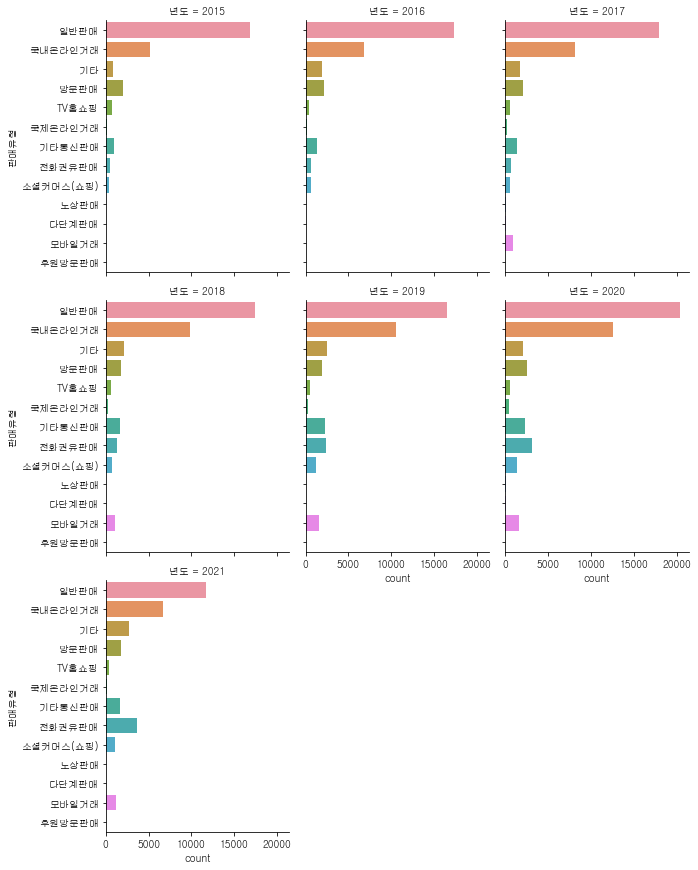

In [26]:
g = sns.catplot(y="판매유형", col="년도",col_wrap=3, 
                data=df, kind="count",
                height=4, aspect=.8)

년도별 피해구제 건수 및 증가율 그래프와 년도별 판매유형 거래건수 그래프를 확인해 보았을 때 국내 온라인 거래, 소셜 커머스 등 다양한 비대면 거래유형의 건수가 증가한 것으로 확인된다.

따라서 코로나 확산으로 인해서 비대면 소비가 증가하는 만큼, '비대면 거래'와 관련된 유형을 '대면 거래'와 자세하게 비교해보기 위해, [국내온라인거래, TV홈쇼핑, 국제온라인거래, 기타통신판매, 전화권유판매, 소셜커머스(쇼핑), 모바일거래] 해당 판매유형을 비대면 거래로 그룹화 하여 거래건수 추이와 거래 비중을 확인해 보았다.

<AxesSubplot:xlabel='년도', ylabel='비대면 거래 건수'>

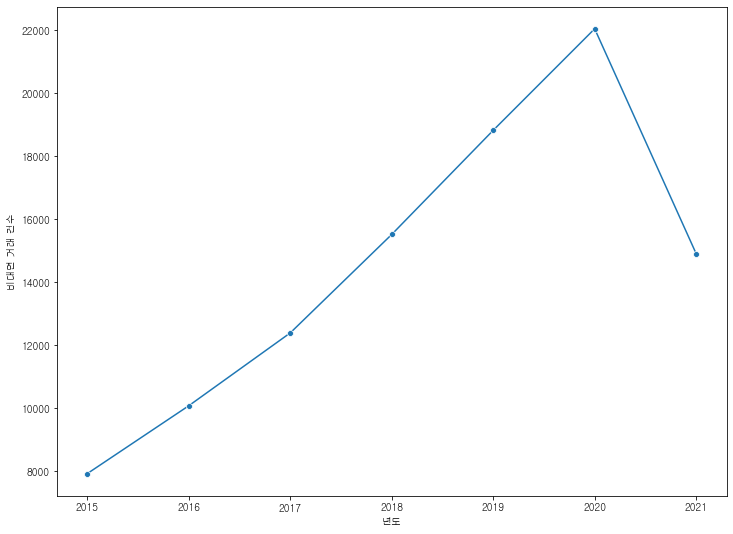

In [27]:
sns.lineplot(x = '년도', y = '비대면 거래 건수', data = df4, marker = 'o')

<AxesSubplot:xlabel='년도', ylabel='비대면 거래 비율'>

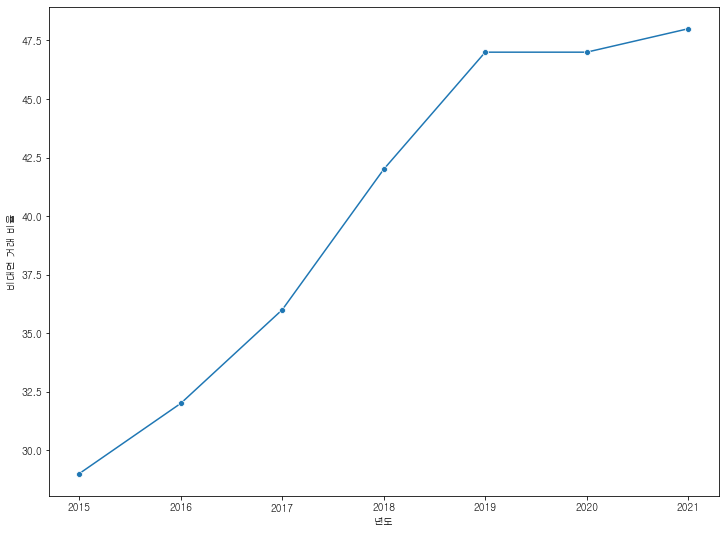

In [28]:
sns.lineplot(x = '년도', y = '비대면 거래 비율', data = df4, marker = 'o')

#### 해석

시각화 결과 매년 비대면 거래 유행에 대한 소비자 피해는 꾸준히 증가하는 모습을 보인다. 

이는 전체 피해구제 건수가 증가하면서 자연스럽게 비대면 거래에 대한 피해구제 건수가 증가하는 현상으로 보인다. 따라서 비대면 거래 유형에 대한 피해구제 건이 증가하는 것으로는 코로나와의 연관성을 확인하기는 어려운 것으로 보인다.
(2021년의 경우 4/4 분기 데이터가 확보되지 않아 비대면 거래건수 그래프가 정확하지 않은 것으로 확인된다.)


추가적으로 년도별 전체 피해구제 건수에서 비대면 거래가 차지하는 비율을 확인해 보았지만, 2019년 비대면 거래 비율(47.1%)이 2020년 비대면 거래비율(46.8%)과 거의 동등한 것으로 보아 비대면 거래 관련 피해구제 건수 증가에 코로나19가 주요 요인이라고 판단하기는 어려운 것으로 확인되엇다. 

따라서 "코로나 전후에 따라 비대면 판매유형 건수가 전체에서 차지하는 비중이 증가했을 것이다" 라는 가설 2는 기각한다.

### 가설 3

다음으로 가설 3(코로나 이후 표시광고, 계약해제.해지/위약금, AS불만에 대한 피해구제 신청이 늘어났을 것이다.)를 검증해 보기 위해 년도별 청구유형 건수 그래프를 시각화 해보았다.

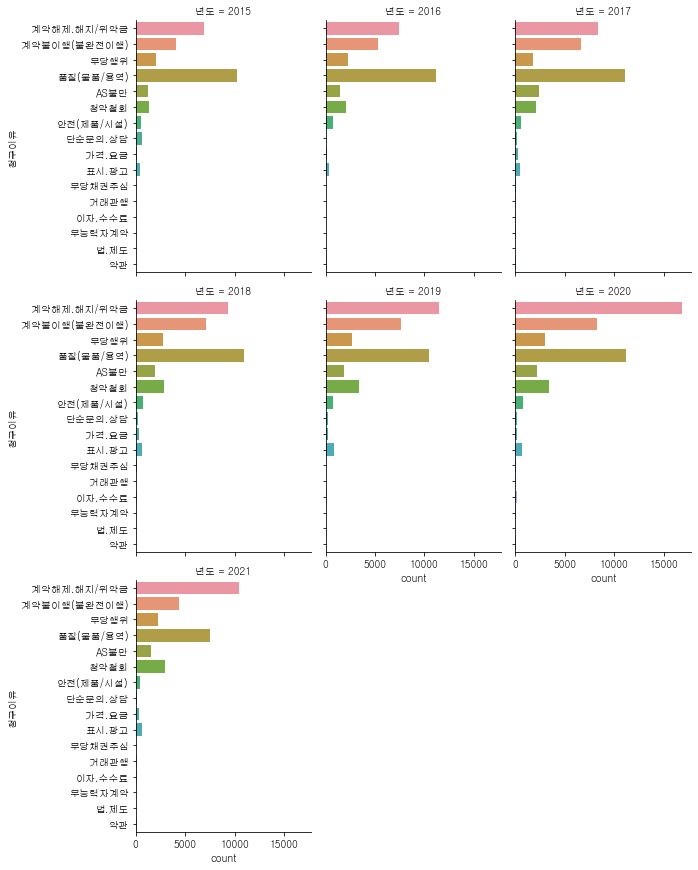

In [29]:
g = sns.catplot(y="청구이유", col="년도",col_wrap=3, 
                data=df, kind="count",
                height=4, aspect=.8)

#### 해석

2016년부터 2018년까지는 품질에 대한 피해청구가 1위이고 뒤이어 계약해제.해지/위약금, 계약불이행(불완전이행) 순으로 확인되었다. 2019년부터 계약해제.해지/위약금 문제가 증가하기 시작하면서 코로나 유행이 시작된 2020년에는 해당 사유에 대한 청구건수가 크게 늘었다는 것을 알 수 있으며, 이 외에도 AS불만, 표시광고의 피해구제 건수가 꾸준히 발생하는 것으로 확인되는데, 좀 더 확실히 알아보기 위해 추이 그래프를 그려봤다.

Text(0.5, 1.0, '년도별 청구이유 추이')

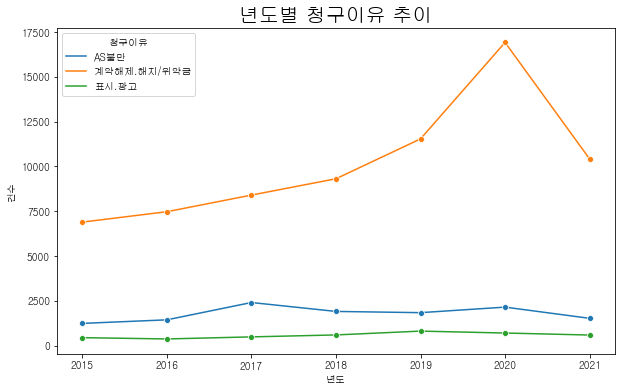

In [30]:
a = df[df.loc[:,'청구이유'] == '계약해제.해지/위약금']
b = df[df.loc[:,'청구이유'] == '표시.광고']
c = df[df.loc[:,'청구이유'] == 'AS불만']

a_1 = pd.concat([a, b], axis = 0) 
df_1 = pd.concat([a_1, c], axis = 0) # 행으로 rbind  
                                     # df_1의 변수로 할당 

df_1_1 = df_1.groupby(['년도', '청구이유']).count()
df_1_1 = df_1_1.reset_index()
df_1_1.loc[:,['년도','청구이유','성별']].head(7)

df_1_1['건수'] = df_1_1.loc[:, '성별']

plt.figure(figsize = (10,6))
sns.lineplot(x = '년도', y = '건수', hue = '청구이유', data = df_1_1, marker = 'o')
plt.title('년도별 청구이유 추이', fontsize=20)

#### 해석

계약 해지에 대한 증가 추세는 확실히 눈에 띄게 가파른 것을 알 수 있지만,  AS불만과 표시광고에 대한 청구건수 추이는 코로나가 발생하기 전과 차이점을 발견하지 못했다. 따라서 유의미한 결과라고 생각되는 계약해제.해지/위약금에 대한 데이터를 좀 더 심층적으로 분석해보았다.

In [31]:
df345 = df[df["청구이유"] == "계약해제.해지/위약금"]

df_2015 = df345[df345.loc[:,'년도'] == 2015]
df_2015 = df_2015.groupby(['년도', '물품소분류']).count()
df_2015 = df_2015.reset_index()
df_2015['피해건수'] = df_2015['성별']
df_2015 = df_2015.sort_values(by = '피해건수', ascending =  False) [:10]

df_2016 = df345[df345.loc[:,'년도'] == 2016]
df_2016 = df_2016.groupby(['년도', '물품소분류']).count()
df_2016 = df_2016.reset_index()
df_2016['피해건수'] = df_2016['성별']
df_2016 = df_2016.sort_values(by = '피해건수', ascending =  False) [:10]

df_2017 = df345[df345.loc[:,'년도'] == 2017]
df_2017 = df_2017.groupby(['년도', '물품소분류']).count()
df_2017 = df_2017.reset_index()
df_2017['피해건수'] = df_2017['성별']
df_2017 = df_2017.sort_values(by = '피해건수', ascending =  False) [:10]

df_2018 = df345[df345.loc[:,'년도'] == 2018]
df_2018 = df_2018.groupby(['년도', '물품소분류']).count()
df_2018 = df_2018.reset_index()
df_2018['피해건수'] = df_2018['성별']
df_2018 = df_2018.sort_values(by = '피해건수', ascending =  False) [:10]

df_2019 = df345[df345.loc[:,'년도'] == 2019]
df_2019 = df_2019.groupby(['년도', '물품소분류']).count()
df_2019 = df_2019.reset_index()
df_2019['피해건수'] = df_2019['성별']
df_2019 = df_2019.sort_values(by = '피해건수', ascending =  False) [:10]

df_2020 = df345[df345.loc[:,'년도'] == 2020]
df_2020 = df_2020.groupby(['년도', '물품소분류']).count()
df_2020 = df_2020.reset_index()
df_2020['피해건수'] = df_2020['성별']
df_2020 = df_2020.sort_values(by = '피해건수', ascending =  False) [:10]

df_2021 = df345[df.loc[:,'년도'] == 2021]
df_2021 = df_2021.groupby(['년도', '물품소분류']).count()
df_2021 = df_2021.reset_index()
df_2021['피해건수'] = df_2021['성별']
df_2021 = df_2021.sort_values(by = '피해건수', ascending =  False) [:10]

df_11 = pd.concat([df_2015, df_2016], axis = 0) 
df_11 = pd.concat([df_11, df_2017], axis = 0) 
df_11 = pd.concat([df_11, df_2018], axis = 0) 
df_11 = pd.concat([df_11, df_2019], axis = 0) 
df_11 = pd.concat([df_11, df_2020], axis = 0) 
df_11 = pd.concat([df_11, df_2021], axis = 0)
df_11.reset_index(inplace = True)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


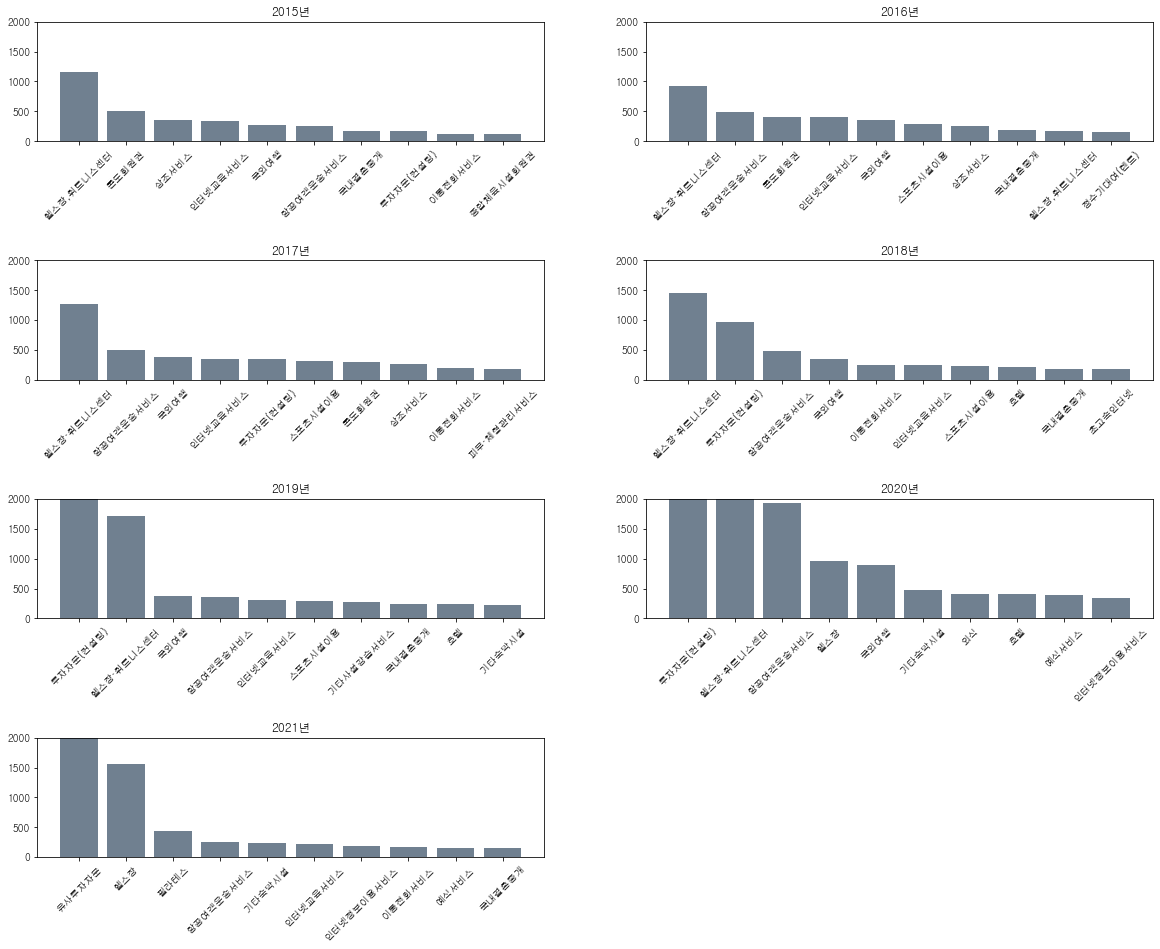

In [32]:
#colors = sns.color_palette('g',len('물품소분류'))
colors = 'slategray'
plt.figure(figsize=(20,4))


plt.subplot(4, 2, 1)
plt.ylim(0,2000)
plt.title("2015년")
plt.xticks(rotation=45)
plt.bar("물품소분류", "피해건수", data = df_2015, color = colors)

plt.subplot(4, 2, 2)
plt.ylim(0,2000)
plt.title("2016년")
plt.bar("물품소분류", "피해건수", data = df_2016, color = colors)
plt.xticks(rotation=45)


plt.subplot(4, 2, 3)
plt.ylim(0,2000)
plt.title("2017년")
plt.bar("물품소분류", "피해건수", data = df_2017, color = colors)
plt.xticks(rotation=45)


plt.subplot(4, 2, 4)
plt.ylim(0,2000)
plt.title("2018년")
plt.bar("물품소분류", "피해건수", data = df_2018, color = colors)
plt.xticks(rotation=45)


plt.subplot(4, 2, 5)
plt.ylim(0,2000)
plt.title("2019년")
plt.bar("물품소분류", "피해건수", data = df_2019, color = colors)
plt.xticks(rotation=45)


plt.subplot(4, 2, 6)
plt.ylim(0,2000)
plt.title("2020년")
plt.bar("물품소분류", "피해건수", data = df_2020, color = colors)
plt.xticks(rotation=45)

plt.subplot(4, 2, 7)
plt.ylim(0,2000)
plt.title("2021년")
plt.bar("물품소분류", "피해건수", data = df_2021, color = colors)
plt.xticks(rotation=45)

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=3, wspace=0.2, hspace=1)
plt.show()

해당 그래프는 계약해지에 관한 청구건수 증가에 영향을 미치는 요인을 파악하기 위해 계약해지에 관한 물품별 청구건수를 시각화한 것이다.

2020년 들어 호텔과 외식, 예식서비스, 항공에 대한 피해구제 신청이 눈에 띄게 늘어난 것으로 확인되는데, 코로나 유행에 따른 사회적 거리두기 강화로 인해 해당 물품 소분류 항목들의 피해구제 신청이 늘어난 것으로 예상된다. 따라서 실제로 거리두기 및 확진자 추이데이터와 비교하여 코로나 유행이 해당 항목들의 건수증가로 이어지게 했는지 확인해 보았다.

In [33]:
df['년월'] = df['접수일(년월일)'].dt.strftime('%Y-%m')
df_corona = df[df.loc[:,'년도'] == 2020] 
# df_corona = df_corona.groupby(['year', '물품소분류']).count()
# df_corona.loc[:,'물품소분류'].value_counts().sort_values(ascending = False)
a = df_corona[df_corona.loc[:,'물품소분류'] == '호텔'] 
b = df_corona[df_corona.loc[:,'물품소분류'] == '예식서비스'] 
#c = df_corona[df_corona.loc[:,'물품소분류'] == '항공여객운송서비스'] 
#d = df_corona[df_corona.loc[:,'물품소분류'] == '기타숙박시설'] 
#e = df_corona[df_corona.loc[:,'물품소분류'] == '호텔'] 
f = df_corona[df_corona.loc[:,'물품소분류'] == '외식'] 

In [34]:
a = pd.concat([a, b], axis = 0) # 행으로 합치기 
#a = pd.concat([a, c], axis = 0) # 행으로 합치기 
#a = pd.concat([a, d], axis = 0) # 행으로 합치기 
#a = pd.concat([a, e], axis = 0) # 행으로 합치기 
a = pd.concat([a, f], axis = 0) # 행으로 합치기 
df_corona_1 = a

In [35]:
df_corona__2 = df_corona_1.groupby(['접수일(년월일)', '물품소분류']).count()
df_corona__2 = df_corona__2.reset_index()
df_corona__2
df_corona__2.sort_values(by = '접수일(년월일)')

df_corona__2 = df_corona__2.loc[:,['접수일(년월일)', '물품소분류', '성별']]
df_corona__2['건수'] = df_corona__2['성별']
df_corona__2 = df_corona__2.drop('성별', axis = 1)
df_corona__2.head(3)

,접수일(년월일),물품소분류,건수
0,2020-01-02,예식서비스,1
1,2020-01-02,외식,3
2,2020-01-02,호텔,4


#### 각 물품소분류별 추이 그래프 그리기

<AxesSubplot:xlabel='접수일(년월일)', ylabel='건수'>

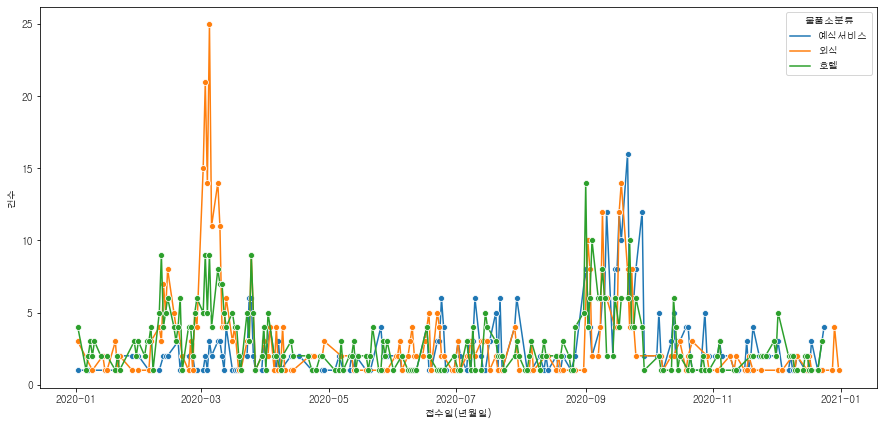

In [36]:
plt.figure(figsize = (15,7))
sns.lineplot(x = '접수일(년월일)', y = '건수', hue = '물품소분류', data = df_corona__2, marker = 'o')

#### 엄격성 지수 Raw Data 불러오기 

In [37]:
gatherings = pd.read_csv('c4_restrictions_on_gatherings.csv')
gatherings

,Unnamed: 0,country_code,country_name,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,...,03Jan2022,04Jan2022,05Jan2022,06Jan2022,07Jan2022,08Jan2022,09Jan2022,10Jan2022,11Jan2022,12Jan2022
0,1,ABW,Aruba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN
1,2,AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,3,AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
4,5,AND,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,182,VUT,Vanuatu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,183,YEM,Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,184,ZAF,South Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,185,ZMB,Zambia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 한국만 뽑기 

In [38]:
gatherings = gatherings[gatherings.loc[:,'country_name'] == 'South Korea']
gatherings = gatherings.iloc[:,2:]

In [39]:
gatherings

,country_name,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,09Jan2020,...,03Jan2022,04Jan2022,05Jan2022,06Jan2022,07Jan2022,08Jan2022,09Jan2022,10Jan2022,11Jan2022,12Jan2022
92,South Korea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN


#### 엄격성 지수 컬럼 확인 

In [40]:
gatherings.columns

Index(['country_name', '01Jan2020', '02Jan2020', '03Jan2020', '04Jan2020',
       '05Jan2020', '06Jan2020', '07Jan2020', '08Jan2020', '09Jan2020',
       ...
       '03Jan2022', '04Jan2022', '05Jan2022', '06Jan2022', '07Jan2022',
       '08Jan2022', '09Jan2022', '10Jan2022', '11Jan2022', '12Jan2022'],
      dtype='object', length=744)

#### 날짜 데이터를 보기좋게 변경하기 

In [41]:
start_date = pd.to_datetime('2020-01-01') ## 시작 날짜
end_date = pd.to_datetime('2022-01-12') ## 마지막 날짜
 
dates = pd.date_range(start_date, end_date, freq='D')

In [42]:
dates 

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10',
               '2022-01-11', '2022-01-12'],
              dtype='datetime64[ns]', length=743, freq='D')

#### 한국 컬럼 제거 

In [43]:
gatherings =  gatherings.iloc[:,1:]
gatherings

,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,09Jan2020,10Jan2020,...,03Jan2022,04Jan2022,05Jan2022,06Jan2022,07Jan2022,08Jan2022,09Jan2022,10Jan2022,11Jan2022,12Jan2022
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN


#### 만들었던 dates index를 엄격성 지수 raw데이터 컬럼에다가 덮어씌우기 

In [44]:
gatherings.columns = pd.Series(dates)

In [45]:
gatherings

,2020-01-01,2020-01-02,2020-01-03,2020-01-04,2020-01-05,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,...,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,2022-01-11,2022-01-12
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN


- 컬럼이 보기좋게 변경되었다.

#### Wide form을 long form으로 바꾸기 

In [46]:
gatherings = pd.melt(gatherings, var_name='Date',value_name='엄격성 지수')
gatherings = gatherings.fillna(0)

- melt 함수를 통해 데이터를 바꿔준다.
- NaN을 0으로 바꿔준다. 

In [47]:
gatherings = gatherings.iloc[:366,:]
gatherings.to_csv("gather.csv", encoding = 'cp949')

- 2020년도까지만 indexing

In [48]:
gather = pd.read_csv('gather.csv', encoding= 'cp949')
print(gather.head(3))

# variable는 날짜 
# value는 엄격성 지수(0 ~ 4까지 있음)

   Unnamed: 0        Date  엄격성 지수
0           0  2020-01-01     0.0
1           1  2020-01-02     0.0
2           2  2020-01-03     0.0


#### 모임제한 정책 엄격성 추이 그래프 그리기

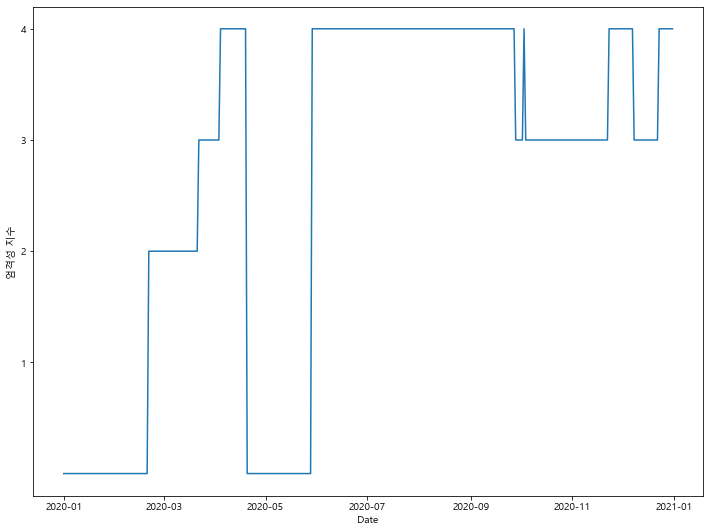

In [49]:
plt.rc('font', family='Malgun Gothic')
sns.lineplot(x = 'Date', y = '엄격성 지수', data = gatherings)
plt.yticks([1,2,3,4])

plt.show()

#### 코로나 확진자 추이 그래프 그리기

In [50]:
corona_Korea = pd.read_excel('코로나바이러스감염증-19_확진환자_발생현황_220113.xlsx')
corona_Korea = corona_Korea.iloc[5:,:]
corona_Korea.columns = ['일자', '확진자 수', 'a', 'dd', 'aa']
corona_Korea = corona_Korea.loc[:,['일자','확진자 수']]
corona_Korea = corona_Korea.astype({'확진자 수': int})
corona_Korea['년도'] = pd.DatetimeIndex(corona_Korea['일자']).year
corona_Korea = corona_Korea[corona_Korea["년도"] == 2020]

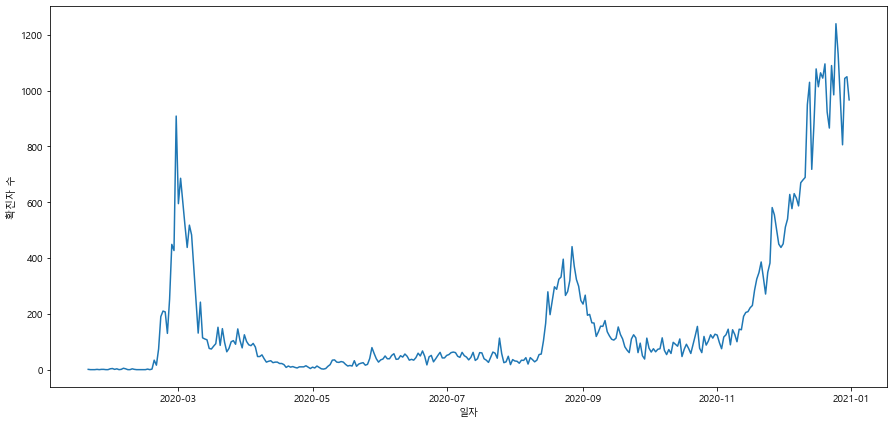

In [51]:
plt.figure(figsize = (15,7))
g = sns.lineplot(x = '일자', y = '확진자 수',  data = corona_Korea)

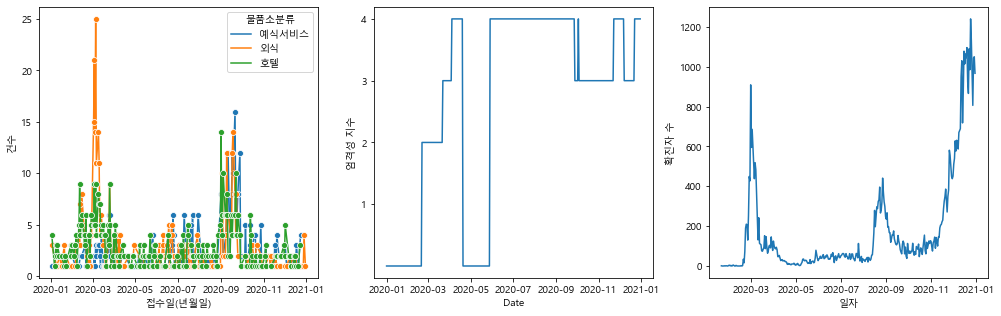

In [52]:
fig = plt.figure(figsize = (17,5))

fig.add_subplot(1,3,1) 
sns.lineplot(x = '접수일(년월일)', y = '건수', hue = '물품소분류', data = df_corona__2, marker = 'o')

fig.add_subplot(1,3,2) 
sns.lineplot(x = 'Date', y = '엄격성 지수', data = gatherings)
plt.yticks([1,2,3,4])

fig.add_subplot(1,3,3)
sns.lineplot(x = '일자', y = '확진자 수',  data = corona_Korea)

plt.show()

#못넣어봤던 범례 넣어보기

먼저 예식서비스와 외식, 호텔의 추이그래프를 그려 코로나 이후 모임제한 엄격성 추이 그래프와 확진자 추이 그래프를 비교해 보았다. 여행의 경우 따로 분리하여 시각화 해주었는데, 데이터 건수가 많지 않아 정확한 추이 확인을 위해서다.

세 그래프를 비교해보았을 때 추이가 비슷한 형태를 띄는 것으로 확인되며, 확진자 수 증가는 정부 방역대책의 엄격성도 높이기 때문에 이에 영향을 받는 품목에 대한 계약해제, 해지 건이 많이 발생한다는 것을 직접 확인할 수 있었다.

다만 2020년 4/4분기에는 코로나 영향이 장기화됨에 따라 정부의 강도높은 방역대책과 소비자의 사적 모임 회피 경향이 지속되면서 코로나 발생 초기와 다르게 확진자수 증가에 비례하여 피해구제 청구가 증가하는 모습을 보이지는 않는다는 특징 또한 확인할 수 있었다.

결과적으로 계약 해제에 관한 청구건수 증가가 코로나19에 기인했다는 것을 확인할 수 있었다.

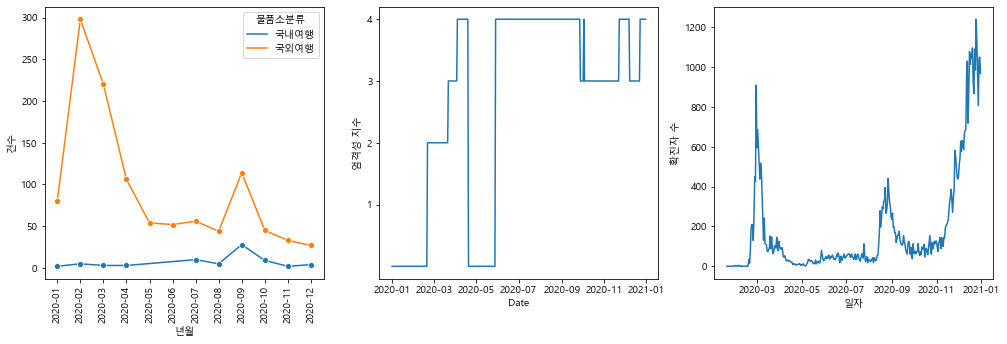

In [53]:
a = df[df.loc[:,'물품소분류'] == '국내여행'] 
b = df[df.loc[:,'물품소분류'] == '국외여행'] 
a = a[a['년도'] == 2020]
b = b[b['년도'] == 2020]

a = pd.concat([a, b], axis = 0)

a = a.groupby(['년월', '물품소분류']).count()
a = a.reset_index()
a.sort_values(by = '년월')

a = a.loc[:,['년월', '물품소분류', '성별']]
a['건수'] = a['성별']
a = a.drop('성별', axis = 1)
a.head(3)

fig = plt.figure(figsize = (17,5))

fig.add_subplot(1,3,1) 
sns.lineplot(x = '년월', y = '건수', hue = '물품소분류', data = a,marker = 'o')
plt.xticks(rotation=90)

fig.add_subplot(1,3,2) 
sns.lineplot(x = 'Date', y = '엄격성 지수', data = gatherings)
plt.yticks([1,2,3,4])

fig.add_subplot(1,3,3)
sns.lineplot(x = '일자', y = '확진자 수',  data = corona_Korea)

plt.show()

국외여행도 마찬가지로 코로나 관련 데이터와 추이가 비슷한 것으로 확인이 되며, 국내 여행의 경우, 2020년 3분기 확진자 수가 다시 증가되며 국내적으로 모임제한이 강화되어 소폭 증가된 것으로 유추된다.

총 5개의 물품소분류의 청구 건수 모두 공통적으로 2월,3월 9월에 가장 높았으며 이는 코로나 추이와 방역엄격성 지수 추이와 일치하였다. 반면 하반기의 경우, 코로나의 장기화로 인해 확진자 추이와 일치하지 않는 특징을 보이는 것으로 확인된다.

#### 추가적으로 분석으로 알 수 있었던 결과(예식, 외식, 여행, 호텔 피해구제 건수 증가)와 관련하여 추가 설명을 위해 한국소비자원의 소비자 이슈 자료를 찾아보았다.

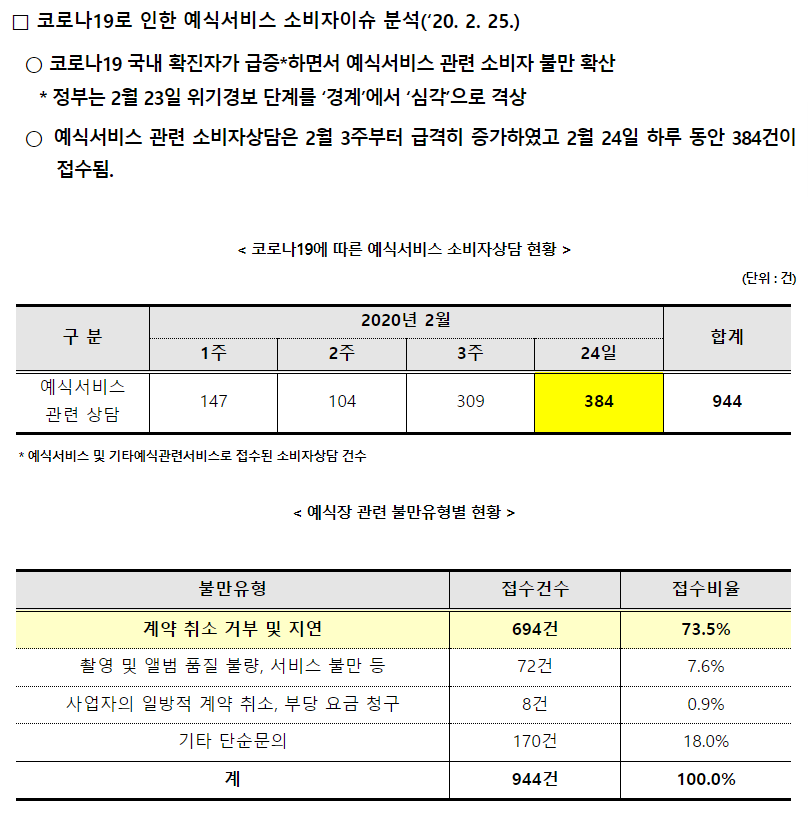

한국 소비자원이 제공하는 예식서비스 소비자 이슈 분석 자료를 통해서 코로나19에 따라 예식서비스 소비자 상담 건수가 2020년 2월 3주부터 급격하게 증가하였다는 것을 확인할 수 있었고, 대부분의 불만유형도 계약해지 및 취소와 관련된 것을 확인할 수 있었다.

일별 코로나 확진자수 그래프와 코로나 이후 모임제한 정책엄격성 추이 그래프에서도 각각 모두 2020년 2월 말부터 증가하는 것을 확인할 수 있었는데 이를 통해 예식과 관련된 소비자이슈는 코로나19의 등장과 연관지어 발생한 소비자 이슈라고 결론지을 수 있다.

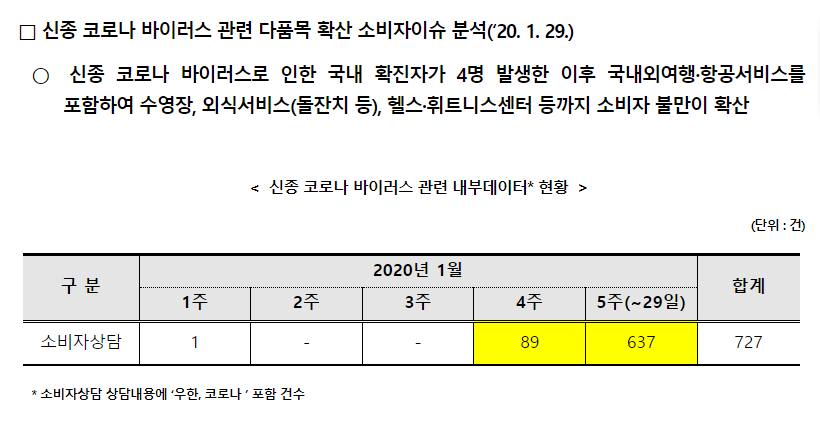

예식서비스 뿐만 아니라 국내외 여행, 외식 등과 같은 여러 품목에서도 코로나19확산 이후로 소비자불만이 급격히 증가하였던 것을 확인해 볼 수 있었다. 

특히 이번 분석 결과 코로나19 이후 국외 여행에 관한 계약해지 피해구제 건수가 2020년 1월 ~ 2월 사이에 급격하게 증가하였던 것을 볼 수 있었는데, 추가적으로 찾아본 신종코로나 바이러스 관련 다품목 확산 소비자이슈 분석 현황을 통해서도 2020년 1월 4주와 5주 사이에 소비자 불만이 확산되어 소비자 상담 건수가 급격하게 증가되었던 것을 확인할 수 있었다.

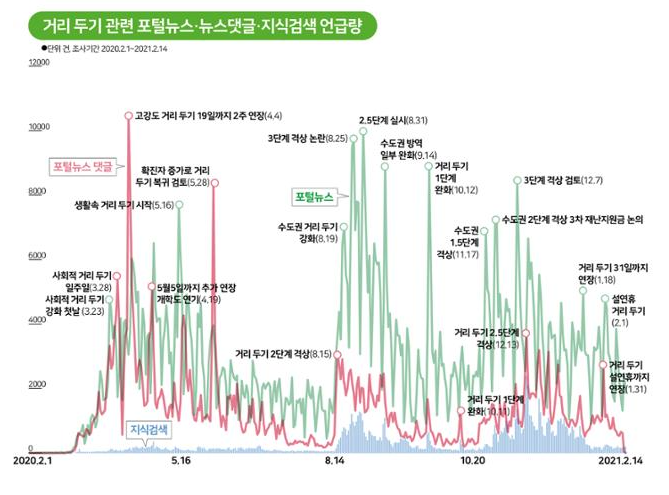

또한 코로나19 사회적 거리두기 관련 포털뉴스, 댓글, 지식검색언급량 추이도 확인해 본 결과, 확진자 추이 및 모임제한 정책엄격성 그래프와 같은 
형태를 띄고 있던 것을 확인할 수 있었다. 

## 결론 및 소감

이로써 한국 소비자원에서 제공하는 소비자 피해구제 현황 데이터 분석이 마무리 되었다.

분석 시작 전 세운 가설 검증을 토대로 분석이 진행 되었고, 피해구제 현황 데이터 이외에 코로나 확진자 추이, 모임제한 엄격성 추이 데이터를 인용해서 추가적으로 해당 분석 결과들이 코로나 유행에 기인함을 확인하여 실제로 코로나로 인해 특정 소비분야에서의 피해구제 현황이 증가되었음을 알 수 있었다.

총 3가지의 가설을 검증하면서 알 수 있었는데, 가설과 결과를 다시 정리해보자면 다음과 같다.

#### 가설 1. 코로나가 본격적으로 유행하기 시작한 2020년도부터 피해구제 신청건수가 늘어났을 것이다.

> 코로나19가 국내에서 본격적으로 유행하기 시작한 2020년도부터 소비자 피해구제 건수가 증가하였다. 이전에는 7-8% 수준이던 피해구제 청구건수가 2020년 들어 약 18% 정도로 크게 상승하였다. 따라서 코로나 확산과 소비자 피해 사건 증가의 연관성을 확인하였다.

#### 가설 2. 코로나 전후에 따라 비대면 판매유형 건수가 전체에서 차지하는 비중이 증가했을 것이다.

> 판매유형에서 비대면 판매유형들을 그룹화 하여 물품 판매 유형을 분석한 결과, 전체 분석기간에 걸쳐서 비대면 거래에 대한 피해구제 신청건수는 증가하는 추세를 보인다. 하지만 국내 코로나 유행 전과 후에 대한 차이는 없는 것으로 판단하여 코로나19의 확산이 비대면 거래 유형에 대한 피해구제 건수의 증가를 이끌었다고 보기는 어려웠다.


#### 가설 3. 코로나 이후 표시광고, 계약해제.해지/위약금, AS불만에 대한 피해구제 신청이 늘어났을 것이다.

> 2020년 들어 계약 해제. 해지/위약금 청구이유, AS불만, 표시광고에 대해 피해구제 건수가 증가한 것으로 확인되어 추이그래프를 그려보았으나, 계약해제, 해지/위약금 항목에서 유의미한 차이를 보였고, 해당 항목의 물품소분류는 예식서비스, 외식, 호텔, 여행인것으로 나타났다.

가설 3을 검증하면서 코로나로 인해 피해구제 현황이 증가되었다는 것을 입증해낼 수 있을 것 같다고 판단하여 해당 물품소분류(예식서비스, 외식, 호텔, 여행)의 추이와 코로나 확진자, 모임 엄격성 추이 데이터를 시각화 하였고, 결론적으로 피해구제 현황의 증가가 코로나에 기인했다는 것을 알 수 있었다.

이번 분석에서 느끼게 된 것은 데이터 전처리가 전체 과정에서 큰 비중을 차지한다는 것과 같은 그래프를 보더라도 해석이 다르게 될 수 있다는 것, 인사이트를 발굴하는 능력을 더 발전시킬 필요가 있다는 것이었다.

마지막으로 한계점을 짚어보면 2021년 4/4분기 데이터 수집이 되지 않았기 때문에 현재까지의 소비자 피해와 관련된 데이터를 확인하지는 못한 점이 아쉬운 점으로 남는다. 다만 이후 데이터 추가로 코로나 유행 전과 후에 대한 더 명확한 분석이 가능할 것이며, 코로나 확산 시기 내에서의 변화에 대해서도 알아볼 수 있을 것으로 기대된다.

아직 추가적으로 분석해볼 수 있는 방향들이 남아있지만, 해당 분석내용이 제 2의 코로나 사태를 대비하여 소비자 관련 정책이나 피해구제 방지 방안 수립에 도움이 되었으면 좋겠다.

# 감사합니다.